# API 연동
공공데이터포털 오픈API 데이터형은 JSON을 XML로 전달하므로,   
request와 딕셔너리를 활용하면 됨

# JSON 활용 연습
http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31

In [2]:
import requests, json, pandas as pd

In [3]:
URL ='http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31'
resp = requests.get(URL)

In [4]:
resp

<Response [200]>

In [5]:
# 텍스트
data1 = resp.text
print(type(data1), len(data1))
print(data1)

<class 'str'> 37824
[{"id":"41596","date":"20190102","symbol":null,"open":"184.63","close":"186.29","high":"187.67","low":"184.17","settlement":"186.2","volume":"91835"},{"id":"41597","date":"20190103","symbol":null,"open":"186.2","close":"188.77","high":"189.59","low":"185.92","settlement":"188.77","volume":"78995"},{"id":"41603","date":"20190104","symbol":null,"open":"188.77","close":"189.59","high":"190.6","low":"188.49","settlement":"189.96","volume":"70816"},{"id":"41609","date":"20190107","symbol":null,"open":"190.33","close":"189.78","high":"190.51","low":"188.68","settlement":"189.87","volume":"68009"},{"id":"41610","date":"20190108","symbol":null,"open":"189.78","close":"190.79","high":"192.72","low":"188.77","settlement":"190.24","volume":"118268"},{"id":"41617","date":"20190109","symbol":null,"open":"190.97","close":"190.88","high":"192.44","low":"190.42","settlement":"191.06","volume":"87637"},{"id":"41624","date":"20190110","symbol":null,"open":"190.88","close":"188.77","h

In [6]:
# json
data2 = resp.json()
print(type(data2), len(data2))
print(data2)

<class 'list'> 252
[{'id': '41596', 'date': '20190102', 'symbol': None, 'open': '184.63', 'close': '186.29', 'high': '187.67', 'low': '184.17', 'settlement': '186.2', 'volume': '91835'}, {'id': '41597', 'date': '20190103', 'symbol': None, 'open': '186.2', 'close': '188.77', 'high': '189.59', 'low': '185.92', 'settlement': '188.77', 'volume': '78995'}, {'id': '41603', 'date': '20190104', 'symbol': None, 'open': '188.77', 'close': '189.59', 'high': '190.6', 'low': '188.49', 'settlement': '189.96', 'volume': '70816'}, {'id': '41609', 'date': '20190107', 'symbol': None, 'open': '190.33', 'close': '189.78', 'high': '190.51', 'low': '188.68', 'settlement': '189.87', 'volume': '68009'}, {'id': '41610', 'date': '20190108', 'symbol': None, 'open': '189.78', 'close': '190.79', 'high': '192.72', 'low': '188.77', 'settlement': '190.24', 'volume': '118268'}, {'id': '41617', 'date': '20190109', 'symbol': None, 'open': '190.97', 'close': '190.88', 'high': '192.44', 'low': '190.42', 'settlement': '191

In [7]:
data2

[{'id': '41596',
  'date': '20190102',
  'symbol': None,
  'open': '184.63',
  'close': '186.29',
  'high': '187.67',
  'low': '184.17',
  'settlement': '186.2',
  'volume': '91835'},
 {'id': '41597',
  'date': '20190103',
  'symbol': None,
  'open': '186.2',
  'close': '188.77',
  'high': '189.59',
  'low': '185.92',
  'settlement': '188.77',
  'volume': '78995'},
 {'id': '41603',
  'date': '20190104',
  'symbol': None,
  'open': '188.77',
  'close': '189.59',
  'high': '190.6',
  'low': '188.49',
  'settlement': '189.96',
  'volume': '70816'},
 {'id': '41609',
  'date': '20190107',
  'symbol': None,
  'open': '190.33',
  'close': '189.78',
  'high': '190.51',
  'low': '188.68',
  'settlement': '189.87',
  'volume': '68009'},
 {'id': '41610',
  'date': '20190108',
  'symbol': None,
  'open': '189.78',
  'close': '190.79',
  'high': '192.72',
  'low': '188.77',
  'settlement': '190.24',
  'volume': '118268'},
 {'id': '41617',
  'date': '20190109',
  'symbol': None,
  'open': '190.97',


In [8]:
id_, date, symbol, open_, close= [], [], [], [], []

for item in data2 :
    id_.append(item['id'])
    date.append(item['date'])
    symbol.append(item['symbol'])
    open_.append(item['open'])
    close.append(item['close'])

In [9]:
df = pd.DataFrame({
    'id' : id_,
    'date' : date,
    'symbol' :symbol,
    'open' : open_,
    'close' : close,
})

In [10]:
df.head()

,id,date,symbol,open,close
0,41596,20190102,None,184.63,186.29
1,41597,20190103,None,186.2,188.77
2,41603,20190104,None,188.77,189.59
3,41609,20190107,None,190.33,189.78
4,41610,20190108,None,189.78,190.79


# 공공데이터포털 API 아파트매매 실거래자료 수집
https://wikidocs.net/85279
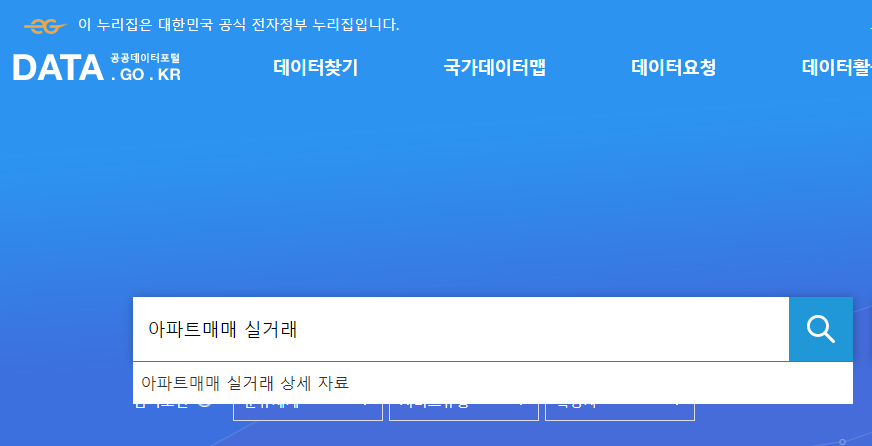

In [11]:
BeautifulSoup?

Object `BeautifulSoup` not found.


In [12]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'

url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text
textsrc

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>

In [13]:
BeautifulSoup?

In [14]:
soup = BeautifulSoup(textsrc, 'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100190</도로명코드><동

In [15]:
items = soup.select('response > body > items > item') 
items

[<item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100190</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 당주동</법정동><법정동본번코드>0145</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드

In [16]:
a = items[0].select('거래금액')
print(type(a))
print(a)

<class 'bs4.element.ResultSet'>
[<거래금액>    82,500</거래금액>]


In [17]:
b = items[0].select_one('거래금액')
print(type(b))
print(b)

<class 'bs4.element.Tag'>
<거래금액>    82,500</거래금액>


In [18]:
c = items[0].select_one('거래금액').text
print(type(c))
print(c)

<class 'str'>
    82,500


In [19]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')

items = soup.select('response > body > items > item') 

for item in items:
    print(item.select_one('거래금액').text.strip(),
          item.select_one('건축년도').text,
          item.select_one('년').text,
          item.select_one('법정동').text.strip(),
          item.select_one('아파트').text,
          item.select_one('월').text,
          item.select_one('일').text,
          item.select_one('전용면적').text,
          item.select_one('지번').text,
          item.select_one('지역코드').text,
          item.select_one('층').text)

ConnectionError: HTTPConnectionPool(host='openapi.molit.go.kr', port=80): Max retries exceeded with url: /OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD=11110&DEAL_YMD=201512&serviceKey=QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DC6434F690>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [20]:
# 반복되는 코드 정리
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

for item in items:
    for tag in item_list:
        print(item.select_one(tag).text.strip(), end=' ')
    print()

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11 
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8 
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6 
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8 
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4 
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8 
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4 
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3 
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18 
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12 


## 결측값 채우기
요청 정보에 대한 응답 데이터가 없을 수도 있다.   
이 경우 별도 처리가 없으면 오류가 발생하므로 대응이 필요하다.

In [21]:
import requests
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
for item in items:
    for tag in item_list:
        print(default_text(item.select_one(tag), ''), end=' ')
    print()

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11 
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8 
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6 
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8 
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4 
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8 
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4 
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3 
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18 
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12 


## csv 파일 저장

In [22]:
import requests, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []

for item in items:
    data_list.append([ default_text(item.select_one(tag), '') for tag in item_list]) # value를 행기준으로 맞춤, 110 X 11
print(data_list)

df = pd.DataFrame(data_list, columns=item_list)
print('='*50)
print(df)
df.to_csv('./sample/아파트매매실거래자료수집.csv', index=False, encoding='cp949') 

[['82,500', '2008', '2015', '사직동', '광화문스페이스본(101동~105동)', '12', '10', '94.51', '9', '11110', '11'], ['60,000', '1981', '2015', '당주동', '롯데미도파광화문빌딩', '12', '22', '149.95', '145', '11110', '8'], ['130,000', '2004', '2015', '내수동', '킹스매너', '12', '8', '194.43', '110-15', '11110', '6'], ['105,000', '2004', '2015', '내수동', '경희궁의아침2단지', '12', '14', '124.17', '71', '11110', '8'], ['120,000', '2003', '2015', '내수동', '경희궁파크팰리스', '12', '24', '146.33', '95', '11110', '4'], ['17,000', '2014', '2015', '연건동', '이화에수풀', '12', '17', '16.98', '195-10', '11110', '8'], ['17,000', '2014', '2015', '연건동', '이화에수풀', '12', '18', '16.98', '195-10', '11110', '4'], ['57,000', '2006', '2015', '명륜1가', '렉스빌', '12', '29', '106.98', '19', '11110', '3'], ['44,000', '1995', '2015', '명륜2가', '아남1', '12', '1', '84.8', '4', '11110', '18'], ['52,000', '1995', '2015', '명륜2가', '아남1', '12', '10', '84.9', '4', '11110', '12']]
      거래금액  건축년도     년   법정동                  아파트   월   일    전용면적      지번  \
0   82,500  2008  2015   사직동  광화문

OSError: Cannot save file into a non-existent directory: 'sample'

In [23]:
# 기존 코드
l = []
for item in items:
    print(default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), ''))
    l.append([default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), '')])
print(l)

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 9 11110 11
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 145 11110 8
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 110-15 11110 6
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 71 11110 8
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 95 11110 4
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 195-10 11110 8
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 195-10 11110 4
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 19 11110 3
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 4 11110 18
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 4 11110 12
[['82,500', '2008', '2015', '사직동', '광화문스페이스본(101동~105동)', '12', '10', '94.51', '9', '9', '11110', '11'], ['60,000', '1981', '2015', '당주동', '롯데미도파광화문빌딩', '12', '22', '149.95', '145', '145', '11110', '8'], ['130,000', '2004', '2015', '내수동', '킹스매너', '12', '8', '194.43', '110-15', '110-15', '11110', '6'], ['105,000', '2004', '2015', '내수동', '경희궁의아침2단지', '12', '14', '124.17', '71', '71', '11110', '8'], ['120,000', '2003', '

## 여러달 수집

In [24]:
import datetime, dateutil
start_datetime = datetime.datetime(2023, 1, 1)
start_datetime

datetime.datetime(2023, 1, 1, 0, 0)

In [25]:
start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)
start_datetime 

datetime.datetime(2023, 2, 1, 0, 0)

In [26]:
date = start_datetime.strftime('%Y%m') #
date

'202302'

In [27]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
start_datetime = datetime.datetime(2023, 1, 1)

data_list = []
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

while True:
    date = start_datetime.strftime('%Y%m') #202301
    
    if date >= '202309':
        break
        
    region_code = '11110'
    
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
    url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

    res = requests.get(url)
    textsrc = res.text

    soup = BeautifulSoup(textsrc, 'xml')
    items = soup.select('response > body > items > item') 
    
    print('='*10, date, '='*10)
    
    for item in items:
        data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
    
    start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)  # += 1달 

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949') 

========== 202301 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12']]
[['200,000', '2008', '2023', '사직동', '

========== 202303 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202304 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202305 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202306 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202307 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202308 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

OSError: Cannot save file into a non-existent directory: 'sample'

## 여러 지역 코드 수집
지역 코드 : 각 지역별 코드 행정표준코드관리시스템(www.code.go.kr)의 법정동코드 10자리 중 앞 5자리   
https://www.data.go.kr/data/15123287/fileData.do

```python
# import csv
# with open('region_code.csv', 'r', encoding='euc-kr') as f :
#     for line in csv.reader(f):
#         print(line)
data = pd.read_csv("region_code.csv", sep=",")
data
```

In [28]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []        
lawd_cds = [11140, 11170, 11200]
# lawd_cds = [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305,
#        11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545,
#        11560, 11590, 11620, 11650, 11680, 11710, 11740]

start_datetime = datetime.datetime(2023, 1, 1)

while True:
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'    
    
    date = start_datetime.strftime('%Y%m') #202301
    if date >= '202309':
        break
        
    for lawd_cd in lawd_cds:
        print('='*5, date, lawd_cd, '='*5)
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={lawd_cd}&DEAL_YMD={date}&serviceKey={apikey}'

        res = requests.get(url)
        textsrc = res.text

        soup = BeautifulSoup(textsrc, 'xml')
        items = soup.select('response > body > items > item') 
           
        for item in items:
            data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
        
        start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1) #  += 1달

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949')
print('저장 완료')

===== 202301 11140 =====
[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4']]
===== 202301 11170 =====
[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75',

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

OSError: Cannot save file into a non-existent directory: 'sample'

# 네이버 지식인 API 연동
https://developers.naver.com/docs/serviceapi/search/kin/kin.md#%EC%A7%80%EC%8B%9DiN

In [29]:
import requests, time, os, json
from html import unescape

In [30]:
# input
client_id = 'xVpqDY_a8tcrDFKg7LuZ'
client_secret = 'NDOtbLui7x'

queries = ['전주 여행', '경주 여행']
goal_page = 5

In [31]:
# setting
user_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) " + \
             "AppleWebKit/537.36 (KHTML, like Gecko) " + \
             "Chrome/51.0.2704.103 Safari/537.36"

headers = {"User-Agent": user_agent,
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret}

In [32]:
file_name = './sample/naver_kin.txt'

with open(file_name, 'w', encoding='utf-8') as f :
    f.write('query\tno\ttitle\tlink\tdescription\ttotal_text\n')

FileNotFoundError: [Errno 2] No such file or directory: './sample/naver_kin.txt'

In [ ]:
url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + queries[0] + "&start=" + str(1)
response = requests.get(url, headers=headers)
response

In [ ]:
print(response.text)

In [ ]:
json.loads(response.text)

In [ ]:
json.loads(response.text)['items']

In [ ]:
elements = json.loads(response.text)['items']
elements[0]

In [ ]:
def get_list(query, page):
    print('='*5, query, page, '='*5)
    url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + query + "&start=" + str(page+1)
    response = requests.get(url, headers=headers)
    elements = json.loads(response.text)['items']

    for i, elm in enumerate(elements):
        title = elm['title'].replace("<b>", "").replace("</b>", "")
        title = unescape(title) # escape된 문자를 unescape문자로 변경
        link = elm['link']
        description = unescape(elm['description'].replace("<b>", "").replace("</b>", ""))
        description = unescape(description)
        
        print([query, (page*100)+(i+1), title, link, description, title+" "+description])

        with open(file_name, 'a', encoding='utf-8') as f: # overwrite 안되도록 add할 것
            f.write( f'{query}\t{(page*100)+(i+1)}\t{title}\t{link}\t{description}\t{title+" "+description}\n')

    return

In [ ]:
for query in queries:
    for page in range(goal_page):
        kin_list = get_list(query, page)
        time.sleep(0.5) #웹페이지 크롤링 매너 최소 6초

# ChatGPT API 연동

In [ ]:
# pip install --upgrade openai
!pip install openai

In [ ]:
import os
from openai import OpenAI

In [ ]:
client = OpenAI(
  api_key= "api key 입력"
)

In [ ]:
client.models.list()

In [ ]:
for m in client.models.list():
    print(m)

In [ ]:
input_text = "인공지능이 뭐야"

In [ ]:
client.chat.completions.create?

In [ ]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user",
         "content": input_text}
        ]
)

In [ ]:
type(response)

In [ ]:
response

In [ ]:
response.choices

In [ ]:
response.choices[0].message.content

In [ ]:
def chatgpt(input_text):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": input_text}]
    )
    output = response.choices[0].message.content
    return output

In [ ]:
chatgpt('what is ai')